# Deep Learning for Time Series Forecasting

Sources: 
- https://machinelearningmastery.com/how-to-get-started-with-deep-learning-for-time-series-forecasting-7-day-mini-course/
- Machine Learning with Python Cookbook by Chris Albon
- Talk by Ilja Rasin (https://www.linkedin.com/in/iljarasin/) at IBM Developer Unconference June 2019, Switzerland

I found this course via LinkedIn posted by Steve Nouri (https://www.linkedin.com/in/stevenouri/)

## Lesson 01: Promise of Deep Learning

In this lesson, you will discover the promise of deep learning methods for time series forecasting. <br>
Generally, neural networks like Multilayer Perceptrons or MLPs provide capabilities that are offered by few algorithms, such as:<br>
 - Robust to Noise. Neural networks are robust to noise in input data and in the mapping function and can even support learning and prediction in the presence of missing values.
 - Nonlinear. Neural networks do not make strong assumptions about the mapping function and readily learn linear and nonlinear relationships.
 - Multivariate Inputs. An arbitrary number of input features can be specified, providing direct support for multivariate forecasting.
 - Multi-step Forecasts. An arbitrary number of output values can be specified, providing direct support for multi-step and even multivariate forecasting.

#### From Machine Learning with Python Cookbook 
> Multilayer perceptrons are feedforward neural networks and represent the simplest artificial neural network used in any real-world setting. The name feedforward comes from the fact that the observations feature values are fed forward through the network. Each layer aims to transform the feature values so that the output at the end is the same as the target's value. 

> Forward propagagion means that an observation (usually a set of observations called a batch) is fed through the network and the output is compared with the true value of the observation using a loss function. 

> Backward propagation means that after the forward propagation the algorithm goes back through the network identifying how much each parameter has contributed to the error between predicted and true value. The optimization algorithm determines at each parameter how much each weight should be adjusted to improve the output.

> The way neural networks learn is by repeating this process of forward and backpropagation for every observation multiple times. Each time all observations have been sent through the network is called an epoch. 

### Your Task

For this lesson you must suggest one capability from both Convolutional Neural Networks and Recurrent Neural Networks that may be beneficial in modeling time series forecasting problems.

Post your answer in the comments below. I would love to see what you discover.



### Answer

##### Convolutional Neural Networks (CNN):
    Sources: 
        - https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/
        
CNNs have proven to be very effective in areas such as image recognition and classification. It takes an imput image, assigns importance, meaning that it learns weights 
and biases. The architecture of a CNN mimics the connectivity pattern of Neurons in the Human Brain. It is dense, meaning that "everything is connected with everything" and the resulting network is dense. Typically, a CNN consists of several layers with four main operations (typically there is a sequence of many CONV, RELU, CONV, RELU, POOL, CONV, RELU, VON, RELU, POOL, ...):
    
1. Convolution
    Extract features from the input image using a feature detector (kernel). The resulting (filtered) image is called a Feature Map. In a CNN there are typically many different type of filters producing a Feature Map with a certain depth.
2. ReLU (Rectified Linear Unit)
    Introduces Non Linearity, by adding an additional element wise operation (on each pixel) after every Convolution operation. It replaces all negative pixel values in the Feature Map with zero.
3. Pooling or Sub Sampling
    Reduces the dimensionality of each Feature Map while retaining the most important information. Spatial pooling is usually Max, Average, Sum, ... For example in Max Pooling, a submatrix of the Feature Map is selected (i.e. 2x2) and take the largest element from the rectified feature map within this submatrix. Pooling progressively reduces spatial size of the input representation. It reduces dimensionality, also reduces number of parameters and computations in the network as a means to control overfitting. It also makes the network invariant to small transformations and help to arrive at an almost scale invariant representation of the image
4. Classification
    In the last step, a MLP is used in combination with i.e. a Softmax activation function to output probabilities, i.e. what is displayed in the image. 
        

#### Recurrent Neural Networks (RNN) 
    Sources:
        -https://machinelearningmastery.com/promise-recurrent-neural-networks-time-series-forecasting/
RNNS (like LSTM) allow the explicit handling of order between observations when learning a mapping function from inputs to outputs. What this means is that there can be a layout of the network such that the connection between input layer and encoder layer 1 is dense, the connection within the network are recurrent, i.e. not dense, and the connection between decoder and output layer is again dense. That way the encoder layer learns to "read" the data and puts out a prediction, but the decoder layer does not consider the output of the encoder, it only considers the "thought" process that the encoder underwent and takes it from there.

The promise of recurrent neural networks is that the temporal dependence in the input data can be learned. That a fixed set of lagged observations does not need to be specified. Rather than having a single multi-tasking cell, the model will use two specialised cells. One for memorising important events of the past (encoder) and one for converting the important events into a prediction of the future (decoder).


## Lesson 02: How to Transform Data for Time Series

In this lesson, you will discover how to transform your time series data into a supervised learning format.

The majority of practical machine learning uses supervised learning.

Supervised learning is where you have input variables (X) and an output variable (y) and you use an algorithm to learn the mapping function from the input to the output. The goal is to approximate the real underlying mapping so well that when you have new input data, you can predict the output variables for that data.

Time series data can be phrased as supervised learning.

Given a sequence of numbers for a time series dataset, we can restructure the data to look like a supervised learning problem. We can do this by using previous time steps as input variables and use the next time step as the output variable.

### Your Task

For this lesson you must develop Python code to transform the daily female births dataset into a supervised learning format with some number of inputs and one output.

You can download the dataset from here: daily-total-female-births.csv

Post your answer in the comments below. I would love to see what you discover.

### Answer


In [2]:
import pandas as pd

df = pd.read_csv('./data/time_series_course_data/daily-total-female-births.csv')
df.tail()

,Date,Births
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55
364,1959-12-31,50


In [3]:
import numpy as np

# define the window width
window_size = 3

# make a test series to develop algorithm
s = pd.Series(np.arange(1,100,1))

# loop to make a new row in the dataframe 
df_window = pd.DataFrame()
for ii in range(0,len(s)-window_size):
    t = s.shift(-ii).values[0:window_size+1]
    df_window = df_window.append(pd.Series(t),ignore_index=True)
    
#     print(t, np.isnan(t).any()) # I used this to check if one of the rows contain a nan
print("Head of df:")
print(df_window.head(),"\n")

print("Tail of df:")
print(df_window.tail(),"\n")

Head of df:
     0    1    2    3
0  1.0  2.0  3.0  4.0
1  2.0  3.0  4.0  5.0
2  3.0  4.0  5.0  6.0
3  4.0  5.0  6.0  7.0
4  5.0  6.0  7.0  8.0 

Tail of df:
       0     1     2     3
91  92.0  93.0  94.0  95.0
92  93.0  94.0  95.0  96.0
93  94.0  95.0  96.0  97.0
94  95.0  96.0  97.0  98.0
95  96.0  97.0  98.0  99.0 



In [4]:
# make a function
import pandas as pd
import numpy as np

def transformDataSetTimeSeries(s, window_size):
    """
    Takes a series as an input and creates a dataframe where the rows correspond to a supervised learning format. In this format rows with a length 
    of j will have j-1 X entries and 1 y entry. It is like a "rolling window".
    INPUT:
        - s: pd.Series() with all the values that shall be put in the supervised learning format. Time series data.
        - window_size: integer number that is the window length
    OUTPUT:
        - df: pd.DataFrame() where each row is another window.
    """
    df = pd.DataFrame()
    assert type(window_size) == int
    for ii in range(0,len(s)-window_size):
        t = s.shift(-ii).values[0:window_size+1]
        df = df.append(pd.Series(t),ignore_index=True)

    return df

In [5]:
transformDataSetTimeSeries(df['Births'], 1).head()

,0,1
0,35.0,32.0
1,32.0,30.0
2,30.0,31.0
3,31.0,44.0
4,44.0,29.0


In [6]:
df['Births'].head(10)

0    35
1    32
2    30
3    31
4    44
5    29
6    45
7    43
8    38
9    27
Name: Births, dtype: int64

In [7]:
births_formatted = transformDataSetTimeSeries(df['Births'], 3)

## Lesson 03: MLP for Time Series Forecasting

In this lesson, you will discover how to develop a Multilayer Perceptron model or MLP for univariate time series forecasting.

We can define a simple univariate problem as a sequence of integers, fit the model on this sequence and have the model predict the next value in the sequence. We will frame the problem to have 3 inputs and 1 output, for example: [10, 20, 30] as input and [40] as output.

First, we can define the model. We will define the number of input time steps as 3 via the input_dim argument on the first hidden layer. In this case we will use the efficient Adam version of stochastic gradient descent and optimizes the mean squared error (‘mse‘) loss function.

Once the model is defined, it can be fit on the training data and the fit model can be used to make a prediction.

The complete example is listed below.

In [8]:
# univariate mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
# define dataset
X = array([[10, 20, 30], [20, 30, 40], [30, 40, 50], [40, 50, 60]])
y = array([40, 50, 60, 70])
# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=2000, verbose=0)
# demonstrate prediction
x_input = array([50, 60, 70])
x_input = x_input.reshape((1, 3))
yhat = model.predict(x_input, verbose=0)
print(yhat)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
[[83.06037]]


Running the example will fit the model on the data then predict the next out-of-sample value.

Given [50, 60, 70] as input, the model correctly predicts 80 as the next value in the sequence.

### Your Task

For this lesson you must download the daily female births dataset, split it into train and test sets and develop a model that can make reasonably accurate predictions on the test set.

You can download the dataset from here: daily-total-female-births.csv

Post your answer in the comments below. I would love to see what you discover.


### Answer

#### Load the dataset and plot it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
Date      365 non-null datetime64[ns]
Births    365 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB
None
        Date  Births
0 1959-01-01      35
1 1959-01-02      32
2 1959-01-03      30
3 1959-01-04      31
4 1959-01-05      44


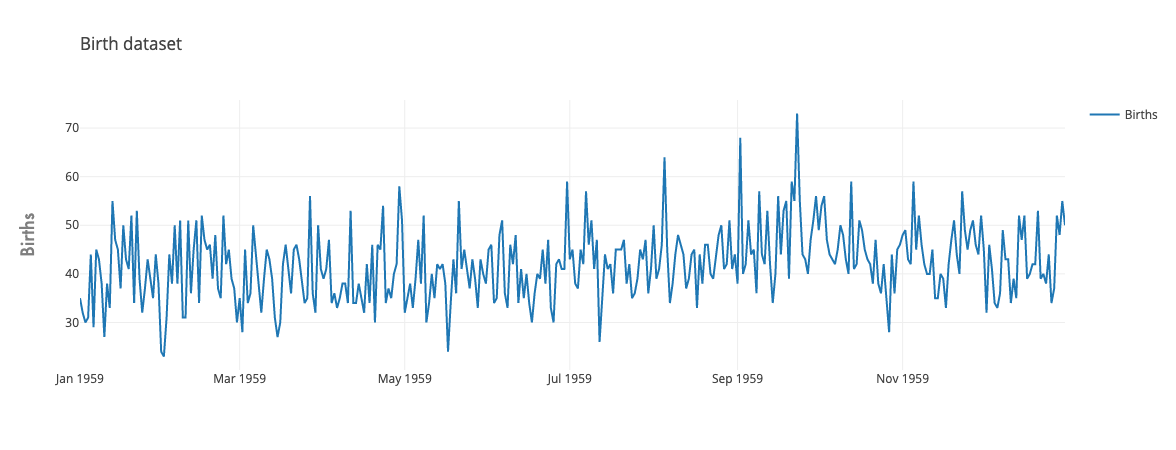

In [9]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline  
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.offline import plot, iplot
import plotly.graph_objs as go


df = pd.read_csv('./data/time_series_course_data/daily-total-female-births.csv')
# convert the Date columns
df['Date'] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
print(df.info())
print(df.head())

# plot

df.set_index('Date', inplace=True)
x=df.index
y=df['Births'].values


# Create a trace
trace = go.Scatter(
    x = x,
    y = y,
    name = 'Births'
)


layout = go.Layout(
            title=go.layout.Title(
                text='Birth dataset',
                xref='paper',
                x=0
            ),
            yaxis=go.layout.YAxis(
                title=go.layout.yaxis.Title(
                    text='Births',
                    font=dict(
                        family='Futura',
                        size=18,
                        color='#7f7f7f'
                    )
                )
            ),
            showlegend=True
        )
data = [trace]
fig = go.Figure(data=data, layout=layout)


iplot(fig)

We see that the dataset contains the number of a metric called daily total femaile births. The data is 365 entries for the year of 1959, from Jan 1 through Dec 31. By eye, the mean number of births is around 40 with most values ranging from 30 through 50. The maximum on September 23 is 73 births and the minimum on May 17 is 24. There seems to be a cloud of larger number of births aroudn the month of September. 

#### Multilayer Perceptron Regression

Adapted from: https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/

As a first try let's consider the time series prediction problem as a regression problem. That is, given the number of births on day j, what is the number of births on day j+1.

In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
# Random seed for reproducibilty
np.random.seed(42)

In [12]:
# Loading the dataset
df = pd.read_csv('./data/time_series_course_data/daily-total-female-births.csv')
# convert the Date columns
df['Date'] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
df['Day'] = df.index
df.head()

,Date,Births,Day
0,1959-01-01,35,0
1,1959-01-02,32,1
2,1959-01-03,30,2
3,1959-01-04,31,3
4,1959-01-05,44,4


With time series data, the sequence of values is important. A simple method that we can use is to split the ordered dataset into train and test datasets. The code below calculates the index of the split point and separates the data into the training datasets with 67% of the observations that we can use to train our model, leaving the remaining 33% for testing the model.

In [14]:
# split into train and test set
split = 0.33 # test set

train_size = int(len(df)*(1-split))
test_size = len(df)-train_size

train = df.loc[0:train_size]
test = df.loc[train_size:]

Now we will use our previously defined function to create the window matrix with a window size of 1. The resulting pattern will be X corresponding to timestep t and y corresponding to timestep t+1.

In [15]:
def transformDataSetTimeSeries(s, window_size):
    """
    Takes a series as an input and creates a dataframe where the rows correspond to a supervised learning format. In this format rows with a length 
    of j will have j-1 X entries and 1 y entry. It is like a "rolling window".
    INPUT:
        - s: pd.Series() with all the values that shall be put in the supervised learning format. Time series data.
        - window_size: integer number that is the window length
    OUTPUT:
        - df: pd.DataFrame() where each row is another window.
    """
    df = pd.DataFrame()
    assert type(window_size) == int
    for ii in range(0,len(s)-window_size):
        t = s.shift(-ii).values[0:window_size+1]
        df = df.append(pd.Series(t),ignore_index=True)

    return df

In [16]:
window_size = 1

train_df = transformDataSetTimeSeries(train['Births'], window_size)
X_train, y_train = train_df.values[:,0], train_df.values[:,1]

test_df = transformDataSetTimeSeries(test['Births'], window_size)
X_test, y_test = test_df.values[:,0], test_df.values[:,1]

Reshaping is necessary because of the input requirements of keras

In [17]:
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

We can now fit a Multilayer Perceptron model to the training data.

We use a simple network with 1 input, 1 hidden layer with 8 neurons and an output layer. The model is fit using mean squared error, which if we take the square root gives us an error score in the units of the dataset.

In [18]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=window_size, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 1s - loss: 1531.1160
Epoch 2/200
 - 0s - loss: 302.4833
Epoch 3/200
 - 0s - loss: 93.8965
Epoch 4/200
 - 0s - loss: 85.7735
Epoch 5/200
 - 0s - loss: 84.9691
Epoch 6/200
 - 0s - loss: 85.1193
Epoch 7/200
 - 0s - loss: 85.4617
Epoch 8/200
 - 0s - loss: 84.9254
Epoch 9/200
 - 0s - loss: 85.2299
Epoch 10/200
 - 0s - loss: 84.8915
Epoch 11/200
 - 0s - loss: 85.4648
Epoch 12/200
 - 0s - loss: 85.1638
Epoch 13/200
 - 0s - loss: 85.1820
Epoch 14/200
 - 0s - loss: 85.1026
Epoch 15/200
 - 0s - loss: 84.8367
Epoch 16/200
 - 0s - loss: 84.0491
Epoch 17/200
 - 0s - loss: 84.8141
Epoch 18/200
 - 0s - loss: 84.2299
Epoch 19/200
 - 0s - loss: 84.0505
Epoch 20/200
 - 0s - loss: 83.4791
Epoch 21/200
 - 0s - loss: 85.2922
Epoch 22/200
 - 0s - loss: 83.6282
Epoch 23/200
 - 0s - loss: 83.0751
Epoch 24/200
 - 0s - loss: 84.3940
Epoch 25/200
 - 0s - loss: 83.0551
Epoch 26/200
 - 0s - loss: 83.3376
Epoch 27/200
 - 0s - loss: 83.4252
Epoch 28/200
 - 0s - loss: 83.1706
Epoch 29/200
 - 0s - loss:

In [19]:
# Estimate model performance
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

Train Score: 59.10 MSE (7.69 RMSE)
Test Score: 55.36 MSE (7.44 RMSE)


This is a pretty bad score, the model averages an erorr of 8 births in the training set and 7 births in the test set.

Finally, we can generate predictions using the model for both the train and test dataset to get a visual indication of the skill of the model.

Because of how the dataset was prepared, we must shift the predictions so that they aline on the x-axis with the original dataset. Once prepared, the data is plotted, showing the original dataset in blue, the predictions for the train dataset in orange the predictions on the unseen test dataset in green.

In [34]:
# generate predictions for training
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# reshape 
trainPredict = trainPredict.reshape(1,-1)[0]
testPredict = testPredict.reshape(1,-1)[0]

# put into df, shift x value for plotting for test
trainPredict = pd.DataFrame(trainPredict, columns=['prediction'])
trainPredict['date'] = df['Date'].iloc[0:len(trainPredict)+1].shift(-1)  # prediction is for the NEXT day
trainPredict.set_index('date', inplace=True)


testPredict = pd.DataFrame(testPredict, columns=['prediction'])
testPredict['x'] = testPredict.index+len(trainPredict)+1
testPredict.set_index('x', inplace=True)
testPredict['date'] = df['Date'].iloc[len(trainPredict):]
testPredict.set_index('date', inplace=True)

print(trainPredict.tail())
print(testPredict.head())

            prediction
date                  
1959-08-29   41.370083
1959-08-30   46.369293
1959-08-31   40.814621
1959-09-01   42.481026
1959-09-02   39.148216
            prediction
date                  
1959-09-03   55.812233
1959-09-04   40.259155
1959-09-05   41.370083
1959-09-06   46.369293
1959-09-07   42.481026


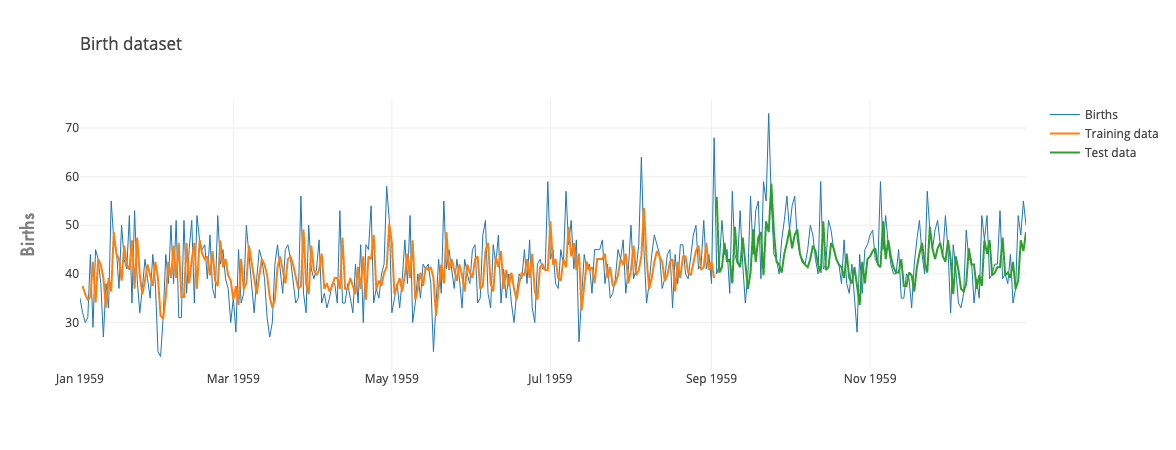

In [35]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.offline import plot, iplot
import plotly.graph_objs as go


df = pd.read_csv('./data/time_series_course_data/daily-total-female-births.csv')
# convert the Date columns
df['Date'] = pd.to_datetime(df["Date"], format="%Y-%m-%d")


# plot

# original data
df.set_index('Date', inplace=True)
x=df.index
y=df['Births'].values

# Create a trace
trace = go.Scatter(
    x = x,
    y = y,
    name = 'Births',
    line = dict(
        width = 1
        )
)

# train data

x=trainPredict.index
y=trainPredict['prediction'].values

# Create a trace
trace2 = go.Scatter(
    x = x,
    y = y,
    name = 'Training data'
)


# test data

x=testPredict.index
y=testPredict['prediction'].values

# Create a trace
trace3 = go.Scatter(
    x = x,
    y = y,
    name = 'Test data'
)



layout = go.Layout(
            title=go.layout.Title(
                text='Birth dataset',
                xref='paper',
                x=0
            ),
            yaxis=go.layout.YAxis(
                title=go.layout.yaxis.Title(
                    text='Births',
                    font=dict(
                        family='Futura',
                        size=18,
                        color='#7f7f7f'
                    )
                )
            ),
            showlegend=True
        )
data = [trace, trace2, trace3]
fig = go.Figure(data=data, layout=layout)


iplot(fig)

In https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/:

We can see that the model did a pretty poor job of fitting both the training and the test datasets. It basically predicted the same input value as the output.

Next we will try the window method, as also done in https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/


#### Multilayer Perceptron with Window Method

The code is the same as above, but this time let's make it a bit more so that we can tweak some parameters.

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
 
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.offline import plot, iplot
import plotly.graph_objs as go
import sys

def transformDataSetTimeSeries(s, window_size):
    """
    Takes a series as an input and creates a dataframe where the rows correspond to a supervised learning format. In this format rows with a length 
    of j will have j-1 X entries and 1 y entry. It is like a "rolling window".
    INPUT:
        - s: pd.Series() with all the values that shall be put in the supervised learning format. Time series data.
        - window_size: integer number that is the window length
    OUTPUT:
        - df: pd.DataFrame() where each row is another window.
    """
    df = pd.DataFrame()
    assert type(window_size) == int
    for ii in range(0,len(s)-window_size):
        t = s.shift(-ii).values[0:window_size+1]
        df = df.append(pd.Series(t),ignore_index=True)

    return df


# make the data structure for supervised learning with the window method
window_size = 3



# Loading the dataset
df = pd.read_csv('./data/time_series_course_data/daily-total-female-births.csv')
# convert the Date columns
df['Date'] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
print(df.head())

# Random seed for reproducibilty
np.random.seed(7)

# split into train and test set
split = 0.67 # train set
# train data
train_size = int(len(df)*(split))

# test data
train = df.loc[0:train_size-1,:]
test = df.loc[train_size:,:]


# train data
train_df = transformDataSetTimeSeries(train['Births'], window_size)
X_train, y_train = train_df.values[:,0:window_size].astype('float32'), train_df.values[:,window_size].astype('float32')


# test data
test_df = transformDataSetTimeSeries(test['Births'], window_size)
X_test, y_test = test_df.values[:,0:window_size].astype('float32'), test_df.values[:,window_size].astype('float32')


# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=window_size, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=400, batch_size=2, verbose=2)
# model.fit(X_train, y_train, epochs=400, batch_size=2, verbose=0)



# Estimate model performance
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

# VISUAL INSPECTION
# generate predictions for training and test
trainPredict_data = model.predict(X_train)
testPredict_data = model.predict(X_test)

# TRAINING DATA
# make an empty array
train_predict = np.empty(shape=(len(df),1))
# ensure that it is nan
train_predict[:,:] = np.nan
# insert the training data into the array at the shifted position
train_predict[window_size:len(trainPredict_data)+window_size,:] = trainPredict_data

# TEST DATA
# make an empty array
test_predict = np.empty(shape=(len(df),1))
# ensure that it is nan
test_predict[:,:] = np.nan
# insert the test data into the array at the shifted position
test_predict[window_size+(len(trainPredict_data))+window_size:,:] = testPredict_data # window from train, all the data from the train, window from the test

Using TensorFlow backend.


        Date  Births
0 1959-01-01      35
1 1959-01-02      32
2 1959-01-03      30
3 1959-01-04      31
4 1959-01-05      44
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/400
 - 1s - loss: 1313.4230
Epoch 2/400
 - 0s - loss: 284.6016
Epoch 3/400
 - 0s - loss: 68.9117
Epoch 4/400
 - 0s - loss: 62.9470
Epoch 5/400
 - 0s - loss: 62.6648
Epoch 6/400
 - 0s - loss: 62.8906
Epoch 7/400
 - 0s - loss: 62.9083
Epoch 8/400
 - 0s - loss: 62.4227
Epoch 9/400
 - 0s - loss: 62.2790
Epoch 10/400
 - 0s - loss: 62.2977
Epoch 11/400
 - 0s - loss: 62.2970
Epoch 12/400
 - 0s - loss: 61.9662
Epoch 13/400
 - 0s - loss: 62.2521
Epoch 14/400
 - 0s - loss: 61.6263
Epoch 15/400
 - 0s - loss: 62.2212
Epoch 16/400
 - 0s - loss: 61.5202
Epoch 17/400
 - 0s - loss: 62.7263
Epoch 18/400
 - 0s - loss: 61.6218
Epoch 19/400
 - 0s - loss: 61.4025
Epoch 20/400
 - 0s - loss: 61.3069
Epoch 21/400
 - 0s - loss: 61.6144
Epoch 22/400
 - 0s - loss

## When to Use Multilayer Perceptrons?
Multilayer Perceptrons, or MLPs for short, are the classical type of neural network.

They are comprised of one or more layers of neurons. Data is fed to the input layer, there may be one or more hidden layers providing levels of abstraction, and predictions are made on the output layer, also called the visible layer.

For more details on the MLP, see the post:

Crash Course On Multi-Layer Perceptron Neural Networks

MLPs are suitable for classification prediction problems where inputs are assigned a class or label.

They are also suitable for regression prediction problems where a real-valued quantity is predicted given a set of inputs. Data is often provided in a tabular format, such as you would see in a CSV file or a spreadsheet.

Use MLPs For:

- Tabular datasets
- Classification prediction problems
- Regression prediction problems
- They are very flexible and can be used generally to learn a mapping from inputs to outputs.

This flexibility allows them to be applied to other types of data. For example, the pixels of an image can be reduced down to one long row of data and fed into a MLP. The words of a document can also be reduced to one long row of data and fed to a MLP. Even the lag observations for a time series prediction problem can be reduced to a long row of data and fed to a MLP.

As such, if your data is in a form other than a tabular dataset, such as an image, document, or time series, I would recommend at least testing an MLP on your problem. The results can be used as a baseline point of comparison to confirm that other models that may appear better suited add value.

Try MLPs On:

- Image data
- Text Data
- Time series data
- Other types of data

## When to Use Convolutional Neural Networks?
Convolutional Neural Networks, or CNNs, were designed to map image data to an output variable.

They have proven so effective that they are the go-to method for any type of prediction problem involving image data as an input.

For more details on CNNs, see the post:

Crash Course in Convolutional Neural Networks for Machine Learning

The benefit of using CNNs is their ability to develop an internal representation of a two-dimensional image. This allows the model to learn position and scale in variant structures in the data, which is important when working with images.

Use CNNs For:

- Image data
- Classification prediction problems
- Regression prediction problems
- More generally, CNNs work well with data that has a spatial relationship.

The CNN input is traditionally two-dimensional, a field or matrix, but can also be changed to be one-dimensional, allowing it to develop an internal representation of a one-dimensional sequence.

This allows the CNN to be used more generally on other types of data that has a spatial relationship. For example, there is an order relationship between words in a document of text. There is an ordered relationship in the time steps of a time series.

Although not specifically developed for non-image data, CNNs achieve state-of-the-art results on problems such as document classification used in sentiment analysis and related problems.

Try CNNs On:

- Text data
- Time series data
- Sequence input data

## When to Use Recurrent Neural Networks?
Recurrent Neural Networks, or RNNs, were designed to work with sequence prediction problems.

Sequence prediction problems come in many forms and are best described by the types of inputs and outputs supported.

Some examples of sequence prediction problems include:

- One-to-Many: An observation as input mapped to a sequence with multiple steps as an output.
- Many-to-One: A sequence of multiple steps as input mapped to class or quantity prediction.
- Many-to-Many: A sequence of multiple steps as input mapped to a sequence with multiple steps as output.
- The Many-to-Many problem is often referred to as sequence-to-sequence, or seq2seq for short.

For more details on the types of sequence prediction problems, see the post:

Gentle Introduction to Models for Sequence Prediction with Recurrent Neural Networks

Recurrent neural networks were traditionally difficult to train.

The Long Short-Term Memory, or LSTM, network is perhaps the most successful RNN because it overcomes the problems of training a recurrent network and in turn has been used on a wide range of applications.

For more details on RNNs, see the post:

Crash Course in Recurrent Neural Networks for Deep Learning
RNNs in general and LSTMs in particular have received the most success when working with sequences of words and paragraphs, generally called natural language processing.

This includes both sequences of text and sequences of spoken language represented as a time series. They are also used as generative models that require a sequence output, not only with text, but on applications such as generating handwriting.

Use RNNs For:

- Text data
- Speech data
- Classification prediction problems
- Regression prediction problems
- Generative models
- Recurrent neural networks are not appropriate for tabular datasets as you would see in a CSV file or spreadsheet. They are also not appropriate for image data input.

Don’t Use RNNs For:

- Tabular data
- Image data
- RNNs and LSTMs have been tested on time series forecasting problems, but the results have been poor, to say the least. Autoregression methods, even linear methods often perform much better. LSTMs are often outperformed by simple MLPs applied on the same data.

For more on this topic, see the post:

On the Suitability of Long Short-Term Memory Networks for Time Series Forecasting
Nevertheless, it remains an active area.

Perhaps Try RNNs on:

Time series data


## Lession 04: CNN for Time Series Forecasting

In this lesson, you will discover how to develop a Convolutional Neural Network model or CNN for univariate time series forecasting.

We can define a simple univariate problem as a sequence of integers, fit the model on this sequence and have the model predict the next value in the sequence. We will frame the problem to have 3 inputs and 1 output, for example: [10, 20, 30] as input and [40] as output.

An important difference from the MLP model is that the CNN model expects three-dimensional input with the shape [samples, timesteps, features]. We will define the data in the form [samples, timesteps] and reshape it accordingly.

We will define the number of input time steps as 3 and the number of features as 1 via the input_shape argument on the first hidden layer.

We will use one convolutional hidden layer followed by a max pooling layer. The filter maps are then flattened before being interpreted by a Dense layer and outputting a prediction. The model uses the efficient Adam version of stochastic gradient descent and optimizes the mean squared error (‘mse‘) loss function.

Once the model is defined, it can be fit on the training data and the fit model can be used to make a prediction.

The complete example is listed below.



In [21]:
# univariate cnn example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# define dataset
X = array([[10, 20, 30], [20, 30, 40], [30, 40, 50], [40, 50, 60]])
y = array([40, 50, 60, 70])
# reshape from [samples, timesteps] into [samples, timesteps, features]
# print(X)
X = X.reshape((X.shape[0], X.shape[1], 1))
# print(X)
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(3, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x_input = array([50, 60, 70])
x_input = x_input.reshape((1, 3, 1))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[10 20 30]
 [20 30 40]
 [30 40 50]
 [40 50 60]]
[[[10]
  [20]
  [30]]

 [[20]
  [30]
  [40]]

 [[30]
  [40]
  [50]]

 [[40]
  [50]
  [60]]]


array([10])

### Your Task
For this lesson you must download the daily female births dataset, split it into train and test sets and develop a model that can make reasonably accurate predictions on the test set.

You can download the dataset from here: daily-total-female-births.csv

Post your answer in the comments below. I would love to see what you discover.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
Date      365 non-null datetime64[ns]
Births    365 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB
None
        Date  Births
0 1959-01-01      35
1 1959-01-02      32
2 1959-01-03      30
3 1959-01-04      31
4 1959-01-05      44


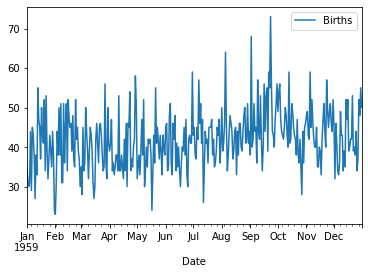

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline  

df = pd.read_csv('./data/time_series_course_data/daily-total-female-births.csv')
# convert the Date columns
df['Date'] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
print(df.info())
print(df.head())
df.plot(x='Date', y='Births')
plt.show()

In [79]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D



# convert to supervised learning problem
def transform_to_supervised(s, window_size):
    """
    Takes a series as an input and creates a dataframe where the rows correspond to a supervised learning format. In this format rows with a length 
    of j will have j-1 X entries and 1 y entry. It is like a "rolling window".
    INPUT:
        - s: pd.Series() with all the values that shall be put in the supervised learning format. Time series data.
        - window_size: integer number that is the window length
    OUTPUT:
        - df: pd.DataFrame() where each row is another window.
    """
    df = pd.DataFrame()
    assert type(window_size) == int
    for ii in range(0,len(s)-window_size):
        t = s.shift(-ii).values[0:window_size+1]
        df = df.append(pd.Series(t),ignore_index=True)

    return df

# scaler object
def scale_data(train, test):
    """
    Scales the train and test data in range of [-1, 1].
    Input:
        - train: training data as numpy array in supervised learning format.
        - test: test data as numpy array in supervised learning format.
    Output:
        - scaler: the scaler object
        - train_scaled: scaled training data
        - test_scaled: scaled test data
    """
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform training data
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test data
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled


def run_lesson_4(df, window_size, batch_size, epochs):
    # split into train and test set
    # df = pd.DataFrame()
    # df['Births'] = np.arange(0,366)
    split = 0.33 # test set
    train_size = int(len(df)*(1-split))
    test_size = len(df)-train_size
    train = df['Births'].iloc[0:train_size]
    test = df['Births'].iloc[train_size:]

    # convert to supervised learning problem
    train_supervised = transform_to_supervised(train, window_size).values
    test_supervised = transform_to_supervised(test, window_size).values

    # scaler?
    # scaler, train_scaled, test_scaled = scale_data(train_supervised, test_supervised)

    # select X and y for training and testing
    X_train = train_supervised[:,0:-1]
    y_train = train_supervised[:,-1]
    X_test = test_supervised[:,0:-1]
    y_test = test_supervised[:,-1]

    # reshape
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    # define model
    # set kernel_size and pool_size to 2 or 1
    if window_size < 3:
        s = 1
    else:
        s = 2
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=s, activation='relu', input_shape=(window_size, 1)))
    model.add(MaxPooling1D(pool_size=s))
    model.add(Flatten())
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # fit model
    model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)

    # Estimate model performance
    train_score = model.evaluate(X_train, y_train,verbose=0)
    print('Train Score: %.2f MSE (%.2f RMSE)' % (train_score, np.sqrt(train_score)))
    test_score = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.2f MSE (%.2f RMSE)' % (test_score, np.sqrt(test_score)))

    # VISUAL INSPECTION
    # generate predictions for training and test
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # shift train and test prediction back
    # train data
    # make an empty array
    train_predict_full = np.empty(shape=(len(df),1))
    # ensure that it is nan
    train_predict_full[:,:] = np.nan
    # insert the training data into the array at the shifted position
    train_predict_full[window_size:len(train_predict)+window_size,:] = train_predict
    # test data
    # make an empty array
    test_predict_full = np.empty(shape=(len(df),1))
    # ensure that it is nan
    test_predict_full[:,:] = np.nan
    # insert the test data into the array at the shifted position
    test_predict_full[len(train_predict)+window_size*2:, :] = test_predict
    predictions = pd.DataFrame({'train': train_predict_full.flatten(), 'test': test_predict_full.flatten()})
    predictions['Date'] = df['Date']

    return predictions, train_score, test_score


### Lesson 04, vary windows size

In [66]:
df = pd.read_csv('./data/time_series_course_data/daily-total-female-births.csv')
# convert the Date columns
df['Date'] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

window_sizes = [1,2,3,4,5]
batch_size = 4
epochs = 300
neurons = 100
output = list()
scores = pd.DataFrame()

for window_size in window_sizes:
    print(f'Running for window_size {window_size}...')
    predictions, train_score, test_score = run_lesson_4(df, window_size, batch_size, epochs)
    output.append(predictions)
    scores[f'train_score_{window_size}'] = train_score
    scores[f'test_score_{window_size}'] = test_score

Running for window_size 1...
Train Score: 56.58 MSE (7.52 RMSE)
Test Score: 47.66 MSE (6.90 RMSE)
Running for window_size 2...
Train Score: 46.12 MSE (6.79 RMSE)
Test Score: 63.58 MSE (7.97 RMSE)
Running for window_size 3...
Train Score: 46.53 MSE (6.82 RMSE)
Test Score: 71.25 MSE (8.44 RMSE)
Running for window_size 4...
Train Score: 46.91 MSE (6.85 RMSE)
Test Score: 74.64 MSE (8.64 RMSE)
Running for window_size 5...
Train Score: 46.66 MSE (6.83 RMSE)
Test Score: 57.65 MSE (7.59 RMSE)


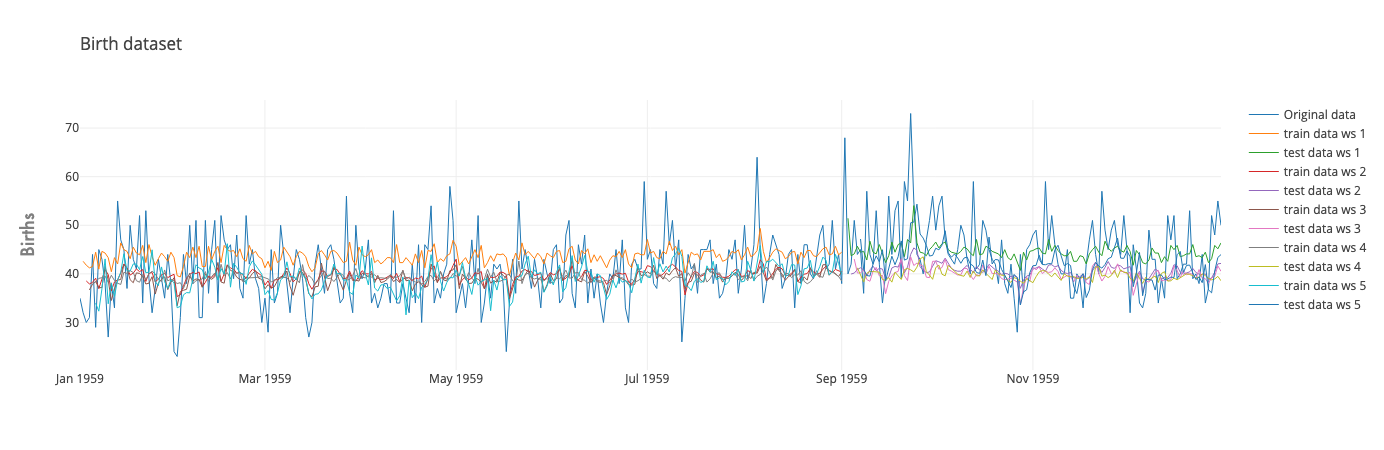

In [78]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.offline import plot, iplot
import plotly.graph_objs as go

def make_a_trace(df, name, colname):
    x=df.index
#     print(colname, df[colname].head())
    y=df[colname].values
    # Create a trace
    trace = go.Scatter(
        x = x,
        y = y,
        name = name,
        line = dict(
            width = 1
            )
    )
    return trace

df_plot = df.set_index('Date')
orig_data_trace = make_a_trace(df_plot, name='Original data', colname='Births')
data = [orig_data_trace]

for df_pred, window_size in zip(output, window_sizes):
    df_pred.set_index('Date', inplace=True)
    trace = make_a_trace(df_pred, name=f'train data ws {window_size}', colname='train')
    data.append(trace)
    trace = make_a_trace(df_pred, name=f'test data ws {window_size}', colname='test')
    data.append(trace)

layout = go.Layout(
            title=go.layout.Title(
                text='Birth dataset',
                xref='paper',
                x=0
            ),
            yaxis=go.layout.YAxis(
                title=go.layout.yaxis.Title(
                    text='Births',
                    font=dict(
                        family='Futura',
                        size=18,
                        color='#7f7f7f'
                    )
                )
            ),
            showlegend=True
        )

fig = go.Figure(data=data, layout=layout)


iplot(fig)

In [76]:
output[4]

,train,test,Date
0,NaN,NaN,1959-01-01
1,NaN,NaN,1959-01-02
2,NaN,NaN,1959-01-03
3,NaN,NaN,1959-01-04
4,NaN,NaN,1959-01-05
5,33.966579,NaN,1959-01-06
6,32.326256,NaN,1959-01-07
7,36.934486,NaN,1959-01-08
8,43.077534,NaN,1959-01-09
9,33.847401,NaN,1959-01-10


### Test


In [83]:
df = pd.read_csv('./data/time_series_course_data/daily-total-female-births.csv')
# convert the Date columns
df['Date'] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
df['Births'] = np.arange(1,len(df)+1,1)*10

window_sizes = [1,2,3]
batch_size = 4
epochs = 100
neurons = 50
output = list()
scores = pd.DataFrame()

for window_size in window_sizes:
    print(f'Running for window_size {window_size}...')
    predictions, train_score, test_score = run_lesson_4(df, window_size, batch_size, epochs)
    output.append(predictions)
    scores[f'train_score_{window_size}'] = train_score
    scores[f'test_score_{window_size}'] = test_score

Running for window_size 1...
Train Score: 8.26 MSE (2.87 RMSE)
Test Score: 65.07 MSE (8.07 RMSE)
Running for window_size 2...
Train Score: 3.25 MSE (1.80 RMSE)
Test Score: 12.09 MSE (3.48 RMSE)
Running for window_size 3...
Train Score: 3.16 MSE (1.78 RMSE)
Test Score: 25.56 MSE (5.06 RMSE)


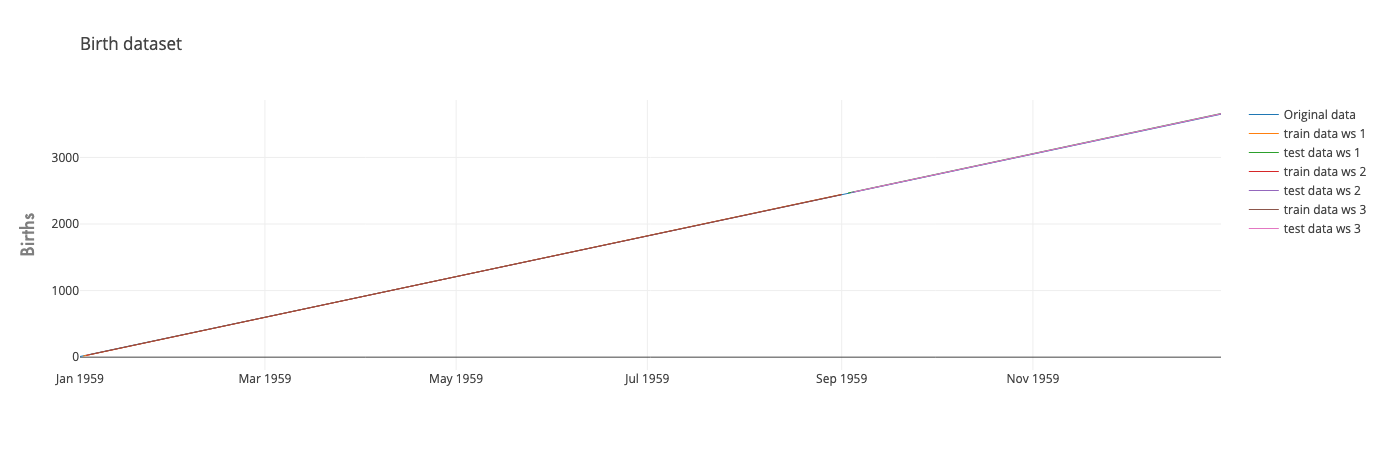

In [84]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.offline import plot, iplot
import plotly.graph_objs as go

def make_a_trace(df, name, colname):
    x=df.index
#     print(colname, df[colname].head())
    y=df[colname].values
    # Create a trace
    trace = go.Scatter(
        x = x,
        y = y,
        name = name,
        line = dict(
            width = 1
            )
    )
    return trace

df_plot = df.set_index('Date')
orig_data_trace = make_a_trace(df_plot, name='Original data', colname='Births')
data = [orig_data_trace]

for df_pred, window_size in zip(output, window_sizes):
    df_pred.set_index('Date', inplace=True)
    trace = make_a_trace(df_pred, name=f'train data ws {window_size}', colname='train')
    data.append(trace)
    trace = make_a_trace(df_pred, name=f'test data ws {window_size}', colname='test')
    data.append(trace)

layout = go.Layout(
            title=go.layout.Title(
                text='Birth dataset',
                xref='paper',
                x=0
            ),
            yaxis=go.layout.YAxis(
                title=go.layout.yaxis.Title(
                    text='Births',
                    font=dict(
                        family='Futura',
                        size=18,
                        color='#7f7f7f'
                    )
                )
            ),
            showlegend=True
        )

fig = go.Figure(data=data, layout=layout)


iplot(fig)